<br>

<br>

# Author:  Tom Bresee
### Email:  tbresee@umich.edu
### Date:  Nov, 2020 

<br>

<br>

## What am I doing ? 

1. A notebook dedicated for confirming everything is working correctly on windows (your pytorch)
2. Way more detailed show commands than most people are aware of 

<br>

## What problem am I trying to solve ? 

1. A notebook dedicated for confirming everything is working correctly on windows (your pytorch)
2. Microsoft is now officially the maintainer of the Windows version of PyTorch, a popular open-source machine-learning library created by Facebook.Way more detailed show commands than most people are aware of 
 * https://www.infoq.com/news/2020/08/pytorch-microsoft-windows/
 * https://venturebeat.com/2020/07/28/facebook-passes-pytorch-for-windows-development-to-microsoft/

<br>

<br>

##### import libraries for testing:

In [46]:
import torch
import torch.nn as nn
import numpy as np
import random
import sys

##### set seeds for reproducibility:

In [47]:
torch.manual_seed(0)

##### what version of pytorch are you running ? 

In [48]:
print("You are running this version of PyTorch (latest stable as of Nov 2020 is 1.7.0): \n   -> ", (torch.__version__))

You are running this version of PyTorch (latest stable as of Nov 2020 is 1.7.0): 
   ->  1.7.0


##### maybe:

In [49]:
# torch.set_num_threads(4)
# torch.set_num_interop_threads(4)

##### confirming if pytorch reads a local GPU:

In [50]:
torch.cuda.is_available() 

True

##### what version of CUDA are we running ? 

In [51]:
torch.cuda_version

'11.0'

##### how i created pytorch (November 2020):

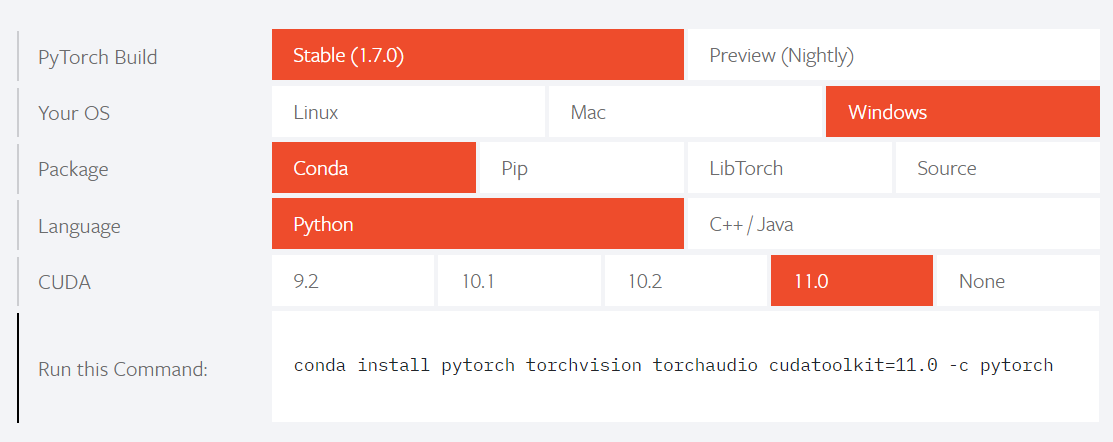

##### tell me something interesting:

In [52]:
! nvidia-smi

Fri Nov 13 11:06:01 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 452.06       Driver Version: 452.06       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2060   WDDM  | 00000000:09:00.0  On |                  N/A |
| 31%   30C    P8    12W / 160W |   1187MiB /  6144MiB |      6%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

```
# What i got in Nov 2020 before i added my second GPU:

Fri Nov 13 10:51:12 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 452.06       Driver Version: 452.06       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2060   WDDM  | 00000000:09:00.0  On |                  N/A |
| 31%   30C    P8    11W / 160W |   1175MiB /  6144MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
!
!
!
```

* explain this:
    * GPU is identifier '0', fan is at 31 %, CUDA Version is 11.0, GPU-Utilization is at 1 %, GPU is GeForce RTX 2060 (ok, intermediate level)
    * WDDM, we will get to that...

##### how do i actually see GPU utilization ? 

November 2020:  
  * yeah, looks like windows 10 doesn't natively tie into GPU for % utilization nicely, so you have a couple paths
  * CTL+ALT+DEL and click performance and then GPU but **YOU HAVE TO SPECIFY Cuda IN THE MENU PULL DOWN**.  If you don't, you will just see random numbers. 

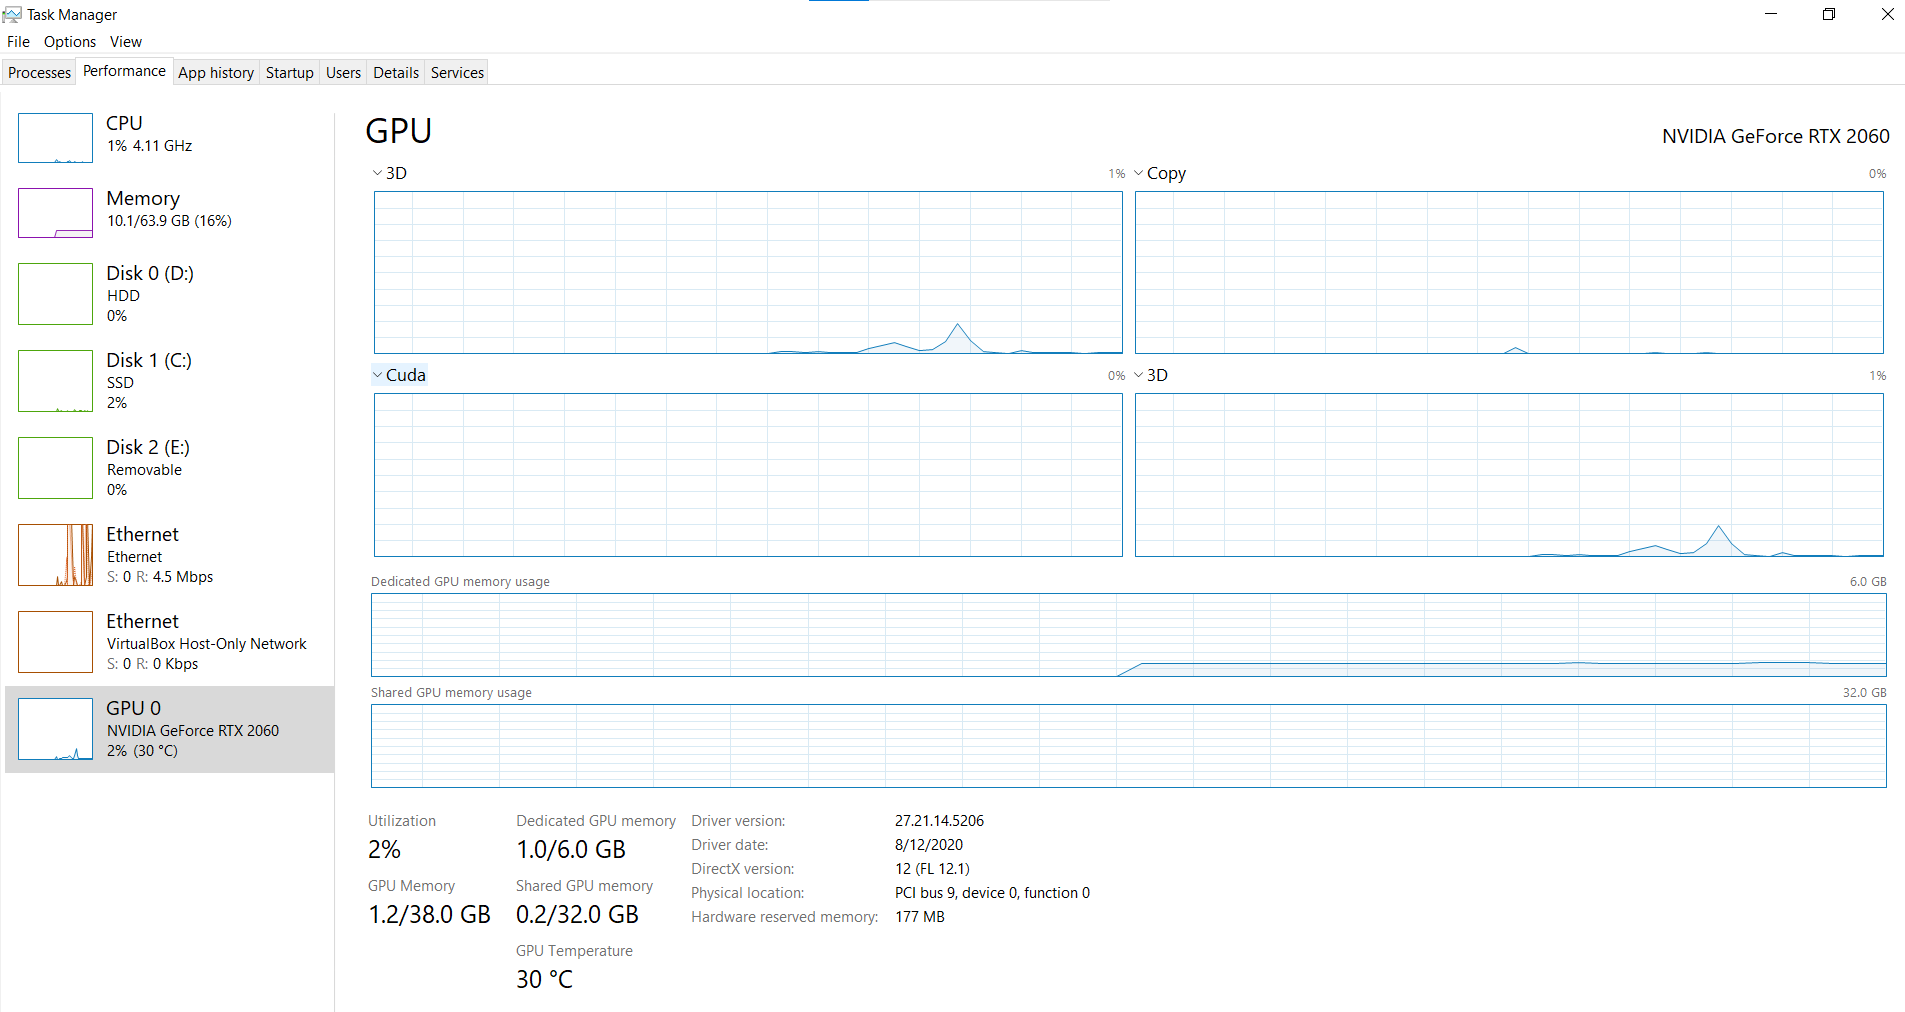

##### prove it:

In [53]:
print('\n__Python VERSION:    ', sys.version, "\n")
print('__pyTorch VERSION:   ', torch.__version__, "\n")
print('__CUDA VERSION')


__Python VERSION:     3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)] 

__pyTorch VERSION:    1.7.0 

__CUDA VERSION


##### stop, this is important:

In [54]:
print('\n__CUDNN VERSION:', torch.backends.cudnn.version())
# I had:   __CUDNN VERSION: 8004


__CUDNN VERSION: 8004


In [55]:
print('\n__Number CUDA Devices:', torch.cuda.device_count())
# number of gpu you have on your system


__Number CUDA Devices: 1


##### what is my active GPU loc right now ? 

In [56]:
print('\nActive CUDA Device: GPU', torch.cuda.current_device(), "\n")

# Active CUDA Device: GPU 0, but when i insert the second gpu it will be GPU 0, but I'll also have
# GPU 1 as well...


Active CUDA Device: GPU 0 



In [57]:
print ('\nCurrent CUDA device ', torch.cuda.current_device())


Current CUDA device  0


##### give me more info:

In [58]:
! nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Tue_Sep_15_19:12:04_Pacific_Daylight_Time_2020
Cuda compilation tools, release 11.1, V11.1.74
Build cuda_11.1.relgpu_drvr455TC455_06.29069683_0


```
# my output:

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Tue_Sep_15_19:12:04_Pacific_Daylight_Time_2020
Cuda compilation tools, release 11.1, V11.1.74
Build cuda_11.1.relgpu_drvr455TC455_06.29069683_0

so my CUDA tool is v 11.1.74, and includes build version info
```

**nvcc:**  The  main  wrapper  for the NVIDIA CUDA Compiler suite. Used to compile and link both host and gpu code.

##### initialize ! 

In [59]:
# initialize GPU 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [62]:
device  #  device(type='cuda', index=0)

device(type='cuda', index=0)

In [66]:
device.index  # with two, i would have 0 and 1 eventually to work with 

0

In [65]:
device.type

'cuda'

At time of notebook:  

CPU Processor: AMD Ryzen 9 3900X 12-Core Processor, 3793 Mhz, 12 Core(s), 24 Logical Processors